<a href="https://colab.research.google.com/github/fawniechau/Seattle-Weather/blob/main/Chau_Tina_DATA_3320_Seattle_St_Louis_Data_Preparation_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this notebook is to data preparation work for the recorded rainy weathers in Seattle and St. Louis cities. The steps will be explained in a manner that an average reader can easily follow along.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

Load the St. Louis data set

In [3]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

To begin, examine the header of each data frame, which displays the column names and provides a preview of several sample values for each column.

The default of "head()" will show the first 5 rows of the DataFrame. This is a useful method to quickly inspect the structure and content of the DataFrame. 


 Display the contents of the Seattle dataset:

In [4]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


Now display the contents of the St. Louis dataset:

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


We can reference the [data documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) to see the definition of each variable.

Now, we are going to use the `info` method to check the data types, size of the DataFrame, and numbers of missing values. 

In [5]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [6]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


The data types in the St. Louis data set are the same as those in the Seattle data set. However, it is worth noting that the St. Louis data set has a considerably larger number of observations compared to the Seattle data set. While we have previously established that the St. Louis data set covers the year 2017, the increased number of observations cannot be solely attributed to this fact.

**Why might the St. Louis data set be larger?**
The difference in the number of observations between the two data sets may be attributed to various factors, such as missing data in the Seattle Rain dataset and differences in the frequency and spatial coverage of data collection. For instance, the St. Louis data set may have been collected on a daily basis, covering a larger geographical area than the Seattle data set, which may have been collected less frequently or over a smaller spatial region.



Now we are going to use `unique()` to return an array of unique values in the 'STATION' column of each DataFrame. This is useful for understanding how many unique weather stations are included in the St. Louis dataset.

In [7]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [8]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

We are going to use `value_counts()` to return a count of how many times each unqiue value occurs in the 'STATION' column for each data set. 

This is useful for identifying how many observations each station contributed to the St. Louis dataset, and can give insights into which stations may have a more complete or representative set of data.

In [9]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

In [10]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

##Converting `DATE` to datetime

It is important to convert dates to `datetime` types (or `int`) before plotting the data, because when dates are strings or objects, a plot will show successive values next to each other without recognizing possible gaps in dates.

Convert the date columns into `DATETIME` for both datasets. 

In [11]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [12]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [13]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [14]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


## Select relevant subsets of the data

The Seattle dataset has a gap in data for 2017, while the St. Louis dataset has data for that year. To enable a proper comparison, we need to ensure that the datasets cover the same time frame.

Filter the St. Louis dataframe to contain data starting from 2018 onwards, as the Seattle data also covers the same period or later.

In [15]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE']>= '2018-01']
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


Now the St. Louis dataset only includes data from 2018-2022, which should align with the Seattle dataset. 

Seattle also only has one station so we are going to do a select subset for only one station in St. Louis. 

In [16]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

## Identify and deal with missing values

We can tell if a dataset is missing values if `NaN` is present in the dataset. 

Let's check to see if we are missing any values. We can check visually using `msno.matrix`. 



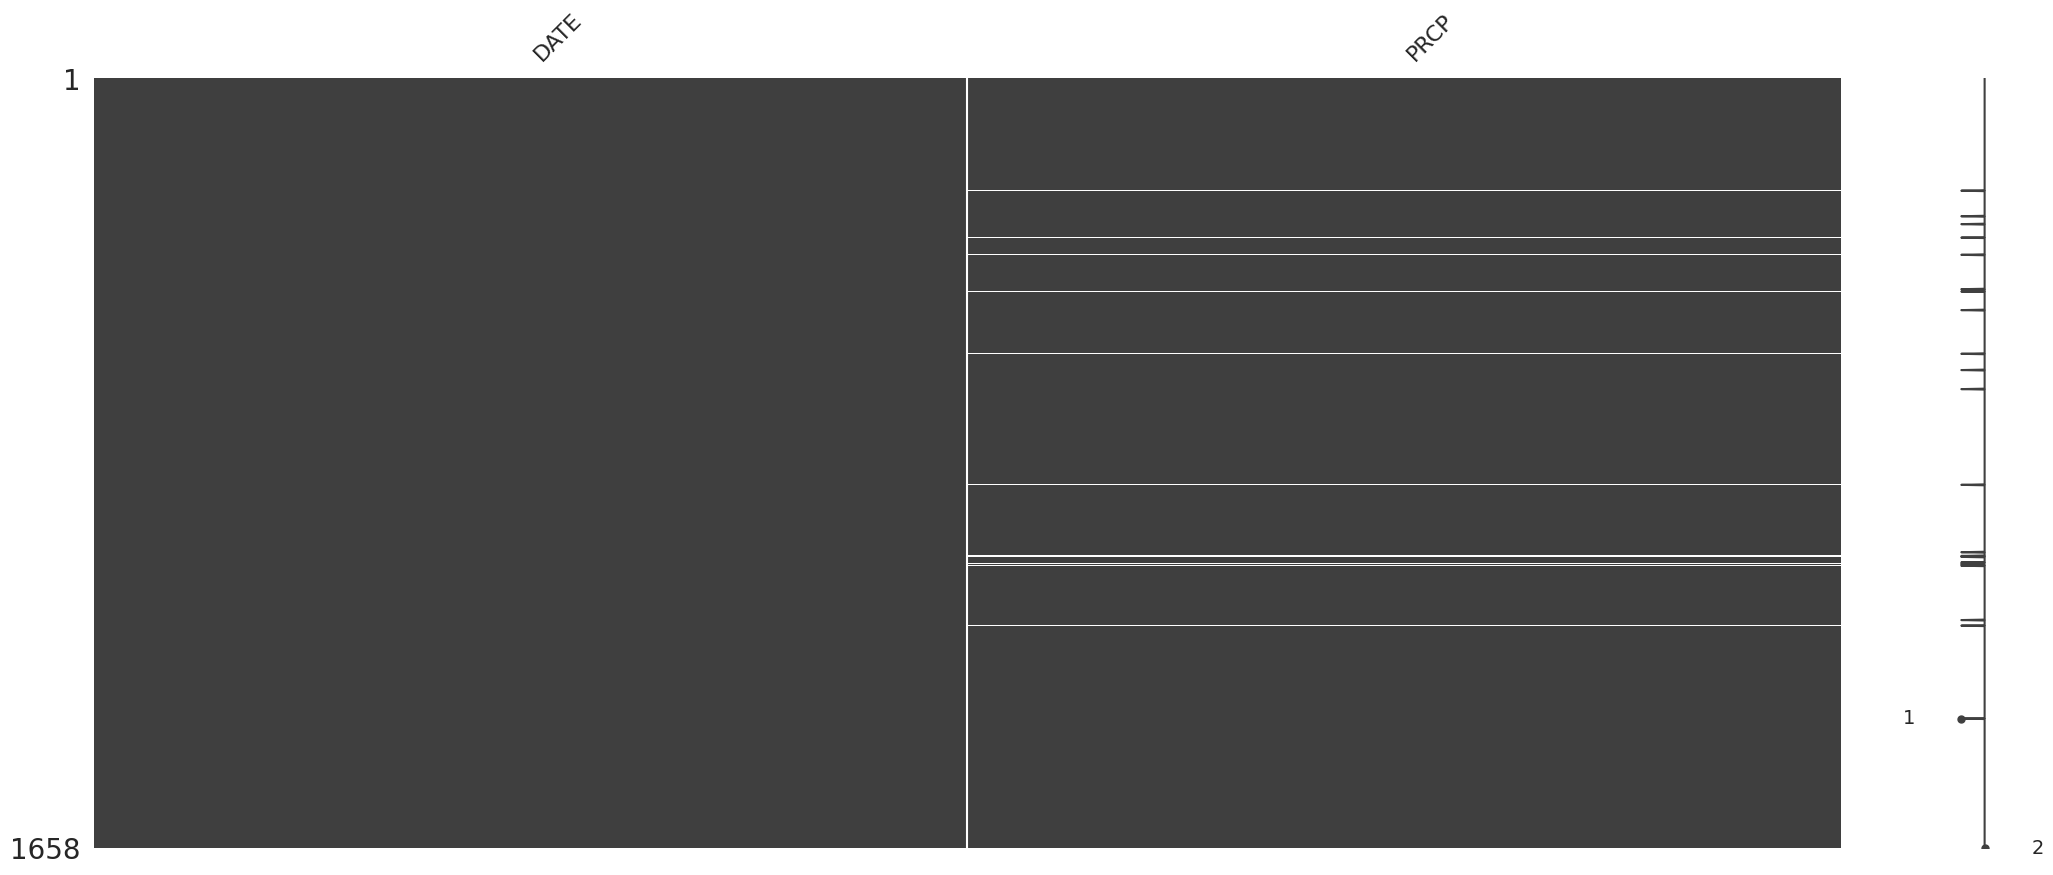

In [17]:
msno.matrix(df_seattle[['DATE', 'PRCP']]);

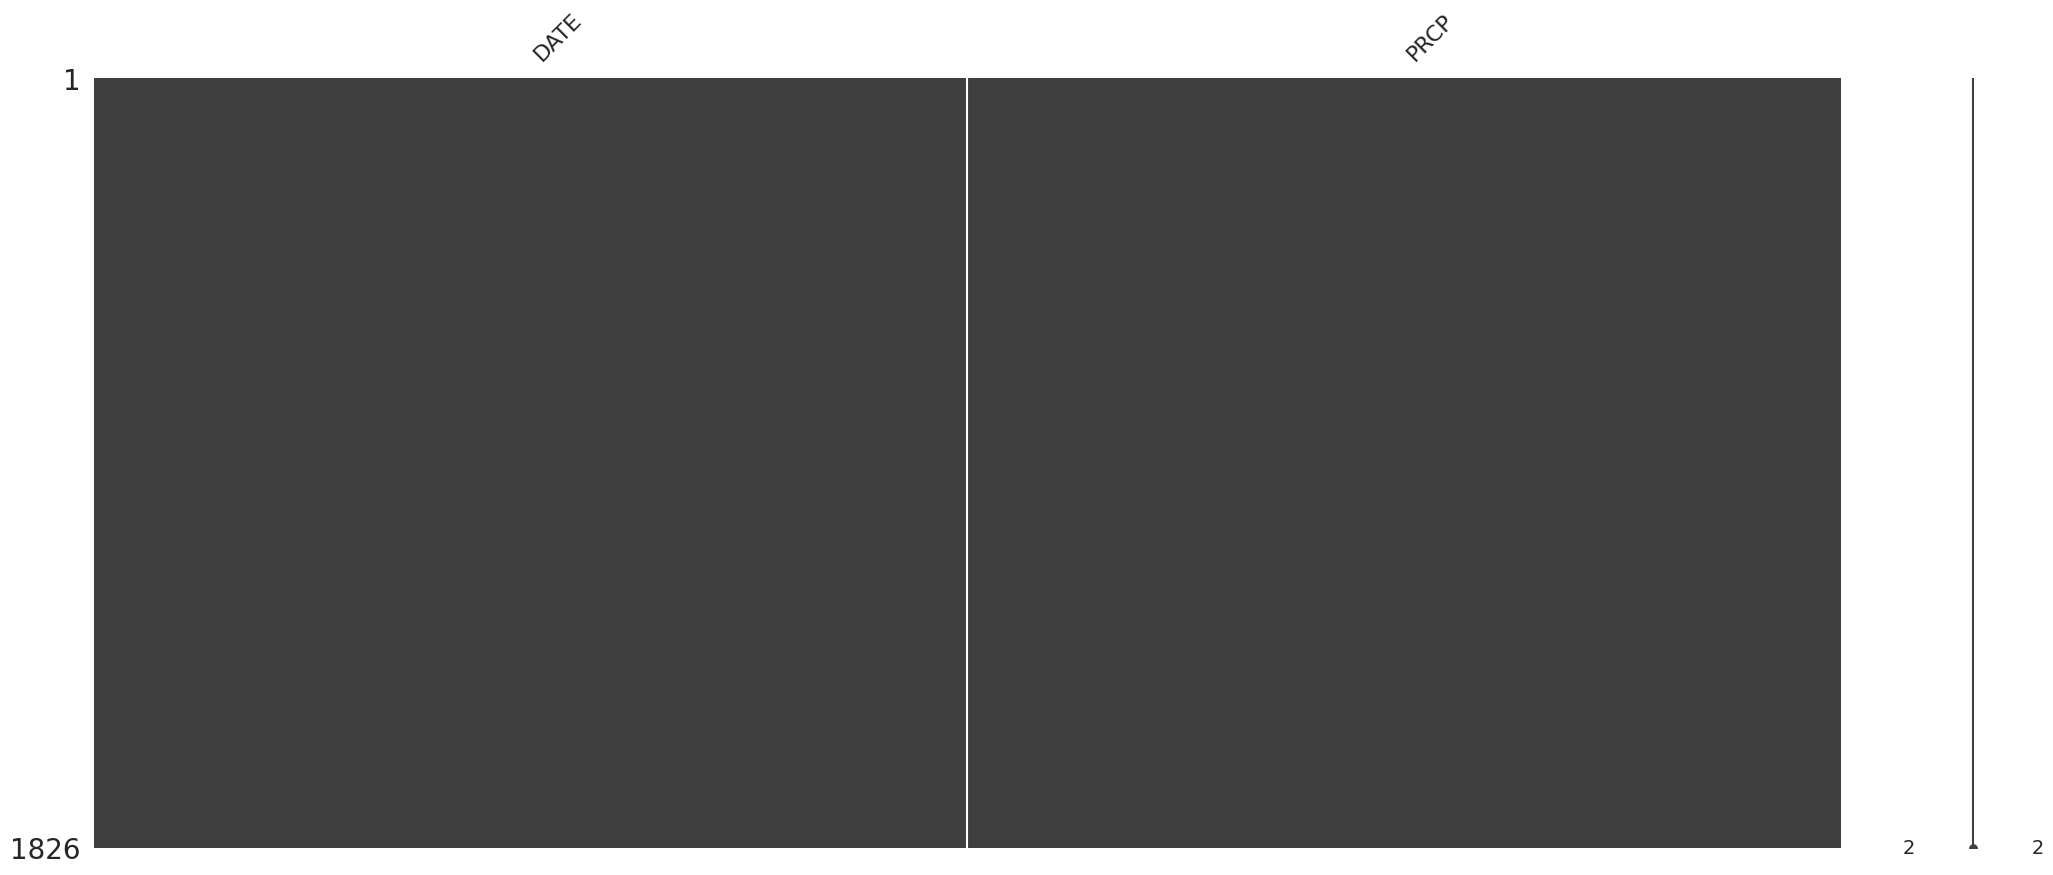

In [18]:
msno.matrix(df_stlouis[['DATE', 'PRCP']]);

The white lines inbetween the bars indicate that there is missing data. We can see the lines in the Seattle dataset, while the St. Louis dataset have solid bars. 

Now let's further check for how much data is in each of the data set using the `info()` function. 

In [19]:
df_seattle.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [20]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


The amount of entries should be 1826 (365 days * 5 days + 1 leap day). Seattle only has 1,657, meaning it has 168 entries. 

## Join data frames keeping `DATE` and `PRCP` columns

We are joining the Seattle and St. Louis dataset with a right join. The right join will result in showing the rows from the St. Louis dataframe, and match rows using the Seattle dataframe. 

In [21]:
pd.merge(df_seattle[['DATE', 'PRCP']], df_stlouis[['DATE', 'PRCP']], how = 'right', on = 'DATE')

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.25,0.00
...,...,...,...
1821,2022-12-27,0.78,0.00
1822,2022-12-28,0.40,0.00
1823,2022-12-29,0.03,0.00
1824,2022-12-30,0.62,0.31


In [22]:
merged = df_seattle[['DATE', 'PRCP']].merge(df_stlouis[['DATE', 'PRCP']], how = 'right', on = 'DATE', suffixes = ('_SEA', '_STL'))
merged

,DATE,PRCP_SEA,PRCP_STL
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.25,0.00
...,...,...,...
1821,2022-12-27,0.78,0.00
1822,2022-12-28,0.40,0.00
1823,2022-12-29,0.03,0.00
1824,2022-12-30,0.62,0.31


## Create a tidy data frame with columns for city and precipitation

`pd.melt()` is used to reshape data frames from a wide format to a long format, making it more convenient for data analysis.

In [23]:
df_tidy = pd.melt(merged, id_vars='DATE', var_name='CITY', value_name='PRCP')
df_tidy.head()

,DATE,CITY,PRCP
0,2018-01-01,PRCP_SEA,0.00
1,2018-01-02,PRCP_SEA,0.00
2,2018-01-03,PRCP_SEA,0.00
3,2018-01-04,PRCP_SEA,0.00
4,2018-01-05,PRCP_SEA,0.25


In [24]:
df_tidy.tail()

,DATE,CITY,PRCP
3647,2022-12-27,PRCP_STL,0.00
3648,2022-12-28,PRCP_STL,0.00
3649,2022-12-29,PRCP_STL,0.00
3650,2022-12-30,PRCP_STL,0.31
3651,2022-12-31,PRCP_STL,0.00


## Rename columns or values to follow best practices

In [25]:
df_tidy.loc[df_tidy['CITY'] == 'PRCP_SEA', 'CITY'] = 'SEA'

In [26]:
df_tidy.loc[df_tidy['CITY'] == 'PRCP_STL', 'CITY'] = 'STL'
df_tidy

,DATE,CITY,PRCP
0,2018-01-01,SEA,0.00
1,2018-01-02,SEA,0.00
2,2018-01-03,SEA,0.00
3,2018-01-04,SEA,0.00
4,2018-01-05,SEA,0.25
...,...,...,...
3647,2022-12-27,STL,0.00
3648,2022-12-28,STL,0.00
3649,2022-12-29,STL,0.00
3650,2022-12-30,STL,0.31


In [27]:
df_tidy = df_tidy.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})
df_tidy.head()

,date,city,precipitation
0,2018-01-01,SEA,0.00
1,2018-01-02,SEA,0.00
2,2018-01-03,SEA,0.00
3,2018-01-04,SEA,0.00
4,2018-01-05,SEA,0.25


## Impute missing values

To obtain an average for the missing days in the SEA dataset, we will calculate the average using the data from the other years.

In [28]:
df_tidy['day_of_year'] = pd.DatetimeIndex(df_tidy['date']).day_of_year

In [29]:
df_tidy.head()

,date,city,precipitation,day_of_year
0,2018-01-01,SEA,0.00,1
1,2018-01-02,SEA,0.00,2
2,2018-01-03,SEA,0.00,3
3,2018-01-04,SEA,0.00,4
4,2018-01-05,SEA,0.25,5


In [30]:
df_tidy.tail()

,date,city,precipitation,day_of_year
3647,2022-12-27,STL,0.00,361
3648,2022-12-28,STL,0.00,362
3649,2022-12-29,STL,0.00,363
3650,2022-12-30,STL,0.31,364
3651,2022-12-31,STL,0.00,365


Let's look for days without data. 

In [31]:
df_tidy[df_tidy['precipitation'].isna()]

,date,city,precipitation,day_of_year
8,2018-01-09,SEA,NaN,9
9,2018-01-10,SEA,NaN,10
10,2018-01-11,SEA,NaN,11
11,2018-01-12,SEA,NaN,12
12,2018-01-13,SEA,NaN,13
...,...,...,...,...
1542,2022-03-23,SEA,NaN,82
1543,2022-03-24,SEA,NaN,83
1544,2022-03-25,SEA,NaN,84
1545,2022-03-26,SEA,NaN,85


Now we are going to summon the index of each row where the precipitation value is missing. 

In [32]:
indices = np.where(df_tidy['precipitation'].isna()==True)[0]
indices

array([   8,    9,   10,   11,   12,   13,   14,   15,   16,   17,   18,
         19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,
         30,   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,
         41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,
         52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,
         63,   64,   65,   66,   67,   68,   69,  264,  305,  306,  307,
        308,  309,  310,  311,  312,  313,  314,  369,  370,  371,  388,
        389,  418,  419,  420,  421,  422,  423,  460,  461,  462,  536,
        537,  542,  543,  544,  545,  546,  547,  548,  549,  550,  551,
        591,  592,  593,  594,  595,  596,  597,  691,  692,  693,  694,
        695,  696,  697,  698,  733,  734,  735,  776,  777,  778,  779,
        780,  781,  782,  783,  784,  785,  786,  992,  993,  994,  995,
        996,  997,  998,  999, 1000, 1001, 1146, 1147, 1148, 1149, 1157,
       1158, 1160, 1161, 1162, 1174, 1175, 1178, 11

We will create a dataset To generate the "average per day" dataset for Seattle, we group the data by the day of the year and calculate the mean precipitation for each "day of year".

In [33]:
mean_day_precipitation = df_tidy.loc[df_tidy['city'] == 'SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()
mean_day_precipitation.head(30)

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
6,0.813333
7,0.607500
8,0.240000
9,0.147500


This code here updates df_tidy by filling in missing precipitation data. It loops through a list of indices for the missing data, and for each index, it assigns the average precipitation value for that day of the year to the corresponding row in the "precipitation" column.

In [34]:
for _, index in enumerate(indices):
  df_tidy.loc[index, 'precipitation'] = mean_day_precipitation.loc[df_tidy['day_of_year'].loc[index]][0]
df_tidy

,date,city,precipitation,day_of_year
0,2018-01-01,SEA,0.00,1
1,2018-01-02,SEA,0.00,2
2,2018-01-03,SEA,0.00,3
3,2018-01-04,SEA,0.00,4
4,2018-01-05,SEA,0.25,5
...,...,...,...,...
3647,2022-12-27,STL,0.00,361
3648,2022-12-28,STL,0.00,362
3649,2022-12-29,STL,0.00,363
3650,2022-12-30,STL,0.31,364


Let's double check for missing data again. 

In [35]:
df_tidy[df_tidy['precipitation'].isna()]

,date,city,precipitation,day_of_year


No more `NaN` values!! 

## Create relevant derived variables as new columns

Although the current variables we have are sufficient, we can enhance the usefulness and significance of the data by adding new variables.

To indicate when the values were recorded, we can include additional columns in the dataset, such as a `month` and `year` column.

In [36]:
df_tidy['month'] = pd.DatetimeIndex(df_tidy['date']).month
df_tidy['year'] = pd.DatetimeIndex(df_tidy['date']).year
df_tidy

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,SEA,0.00,1,1,2018
1,2018-01-02,SEA,0.00,2,1,2018
2,2018-01-03,SEA,0.00,3,1,2018
3,2018-01-04,SEA,0.00,4,1,2018
4,2018-01-05,SEA,0.25,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,STL,0.00,361,12,2022
3648,2022-12-28,STL,0.00,362,12,2022
3649,2022-12-29,STL,0.00,363,12,2022
3650,2022-12-30,STL,0.31,364,12,2022


We could also create a dataframe that includes the mean precipitation of each location for each month. 

In [37]:
mean_prcp = (df_tidy.groupby(['city', 'month']).agg(mean_prcp = ('precipitation','mean')).reset_index())
mean_prcp

,city,month,mean_prcp
0,SEA,1,0.230742
1,SEA,2,0.176472
2,SEA,3,0.089075
3,SEA,4,0.100483
4,SEA,5,0.069161
5,SEA,6,0.063167
6,SEA,7,0.013984
7,SEA,8,0.019995
8,SEA,9,0.055622
9,SEA,10,0.118452


Here's a dataframe that indicates the maximum value of precipitation for each month. 

In [38]:
max_prcp = df_tidy.groupby(['city', 'month'])['precipitation'].max()
max_prcp

city  month
SEA   1        1.97
      2        1.89
      3        1.03
      4        1.65
      5        1.29
      6        1.07
      7        0.62
      8        0.47
      9        0.85
      10       2.00
      11       1.56
      12       2.60
STL   1        2.16
      2        1.73
      3        2.04
      4        2.36
      5        1.79
      6        2.62
      7        8.64
      8        4.32
      9        1.70
      10       2.31
      11       1.50
      12       1.08
Name: precipitation, dtype: float64

## Export the clean .csv file

In [40]:
from google.colab import files

df_tidy.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>